뉴스와 코로나19 확진자 사이의 연관성 조사

In [2]:
import pandas as pd
import numpy as np
import urllib.request as ul
import xmltodict
import json
import sys
import io
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from datetime import datetime 
import seaborn as sns
import scipy as sp
import scipy.stats as stats



In [3]:
#뉴스데이터 받아오기(엑셀)
#긍정적 키워드 - news_c, news_d, news_f
#부정적 키워드 - news_a, news_b, news_e

news_a = pd.read_excel('NewsResult_20200501-20210423(폭증).xlsx')
news_b = pd.read_excel('NewsResult_20200501-20210423(사망, 위험).xlsx')
news_c = pd.read_excel('NewsResult_20200501-20210423(백신, 안정).xlsx')
news_d = pd.read_excel('NewsResult_20200501-20210423(확진자, 감소세).xlsx')
news_e = pd.read_excel('NewsResult_20200501-20210423(확진자, 증가세).xlsx')
news_f = pd.read_excel('NewsResult_20200501-20210423(완치).xlsx')



In [4]:
#뉴스 데이터를 개수로 정리하기

news_a1 = pd.to_numeric(news_a.groupby('일자').count().제목)
news_a1.index = pd.date_range(start = '20200501', end = '20210421') 
news_b1 = pd.to_numeric(news_b.groupby('일자').count().제목)
news_b1.index = pd.date_range(start = '20200501', end = '20210422') 
news_c1 = pd.to_numeric(news_c.groupby('일자').count().제목)
news_c1.index = pd.date_range(start = '20200501', end = '20210423')
news_d1 = pd.to_numeric(news_c.groupby('일자').count().제목)
news_d1.index = pd.date_range(start = '20200501', end = '20210423')
news_e1 = pd.to_numeric(news_c.groupby('일자').count().제목)
news_e1.index = pd.date_range(start = '20200501', end = '20210423')
news_f1 = pd.to_numeric(news_c.groupby('일자').count().제목)
news_f1.index = pd.date_range(start = '20200501', end = '20210423')




In [5]:
#코로나 확진자 데이터 읽어오기(open api)

url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey=aCUC%2FTLCuyGnNlPOC47aWKgwv731EgDTG6AOu85uEfx5BNQ9pQNI1Pvc3xiqtd8O2Qf4%2BxLfvcmZygDFGR4dBw%3D%3D&startCreateDt=20200501&endCreateDt=20210424'             

request = ul.Request(url)

response = ul.urlopen(request)

response_data = response.read()

plt.figure(figsize=(50, 30))
Data_c = xmltodict.parse(response_data)
Data_c = Data_c['response']['body']['items']['item']
Data_c = pd.DataFrame.from_dict(Data_c)


#받아온 데이터 엑셀파일로 정리
Data_c1 = Data_c[::-1]
Data_c1['decideCnt'] = pd.to_numeric(Data_c1['decideCnt'])
Data_c1.sort_values(by = ['stateDt'], inplace = True)

#일별 확진자수 확인을 위해서 새로운 행 생성
Data_c1['Diff'] = Data_c1.decideCnt.diff()
Data_c1 = Data_c1.set_index('stateDt')



<Figure size 3600x2160 with 0 Axes>

In [6]:
Data_c1.set_index(pd.date_range(start = '20200501', end = '20210424'), inplace=True)
Data_c1


,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,seq,stateTime,updateDt,Diff
2020-05-01,1.7536263965,623069,614384,1459,9072,2020-05-01 10:24:38.38,248,10774,8685,603610,125,00:00,2020-05-01 10:24:38.38,NaN
2020-05-02,1.7413329111,627562,619066,1454,9123,2020-05-02 10:22:19.19,250,10780,8496,608286,126,00:00,2020-05-02 10:22:19.19,6.0
2020-05-03,1.7341356234,630973,622385,1407,9183,2020-05-03 10:54:37.37,250,10793,8588,611592,127,00:00,2020-05-03 10:54:37.37,13.0
2020-05-04,1.7261024858,633921,625745,1360,9217,2020-05-04 10:11:32.32,252,10801,8176,614944,128,00:00,2020-05-04 10:11:32.32,8.0
2020-05-05,1.7111750628,640237,631379,1332,9283,2020-05-05 10:20:41.41,254,10804,8858,620575,129,00:00,2020-05-05 10:20:41.41,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20,1.3726760312,8458592,8392002,8166,105227,2021-04-20 09:34:02.801,1802,115195,66590,8276807,486,00:00,null,549.0
2021-04-21,1.3750976675,8497594,8430383,8243,105877,2021-04-21 09:36:56.675,1806,115926,67211,8314457,488,00:00,null,731.0
2021-04-22,1.3772840512,8537505,8470366,8394,106459,2021-04-22 09:31:58.246,1808,116661,67139,8353705,489,00:00,null,735.0
2021-04-23,1.3796528397,8583530,8513591,8576,107071,2021-04-23 09:51:40.55,1811,117458,69939,8396133,490,00:00,null,797.0


In [7]:
Data_c1.Diff 

2020-05-01      NaN
2020-05-02      6.0
2020-05-03     13.0
2020-05-04      8.0
2020-05-05      3.0
              ...  
2021-04-20    549.0
2021-04-21    731.0
2021-04-22    735.0
2021-04-23    797.0
2021-04-24    785.0
Freq: D, Name: Diff, Length: 359, dtype: float64

In [8]:
#부정적인 키워드, 긍정적인 키워드를 담은 뉴스 개수를 합해준다. 

news_n = news_e1 + news_b1 + news_a1
news_n = news_n.rename('negative_news')

news_p = news_c1 + news_d1 + news_f1
news_p = news_p.rename('positive_news')

news_total = news_p + news_n
news_total = news_total.rename('total_news')


In [9]:
def date_p(str_date, i) : 
    if((str_date + i)%100>30):
        str_date = str_date-(str_date%100) + 100 + ( i - 7 )
    else :
        str_date = str_date + i
    return str_date

In [10]:
#과연 코로나 관련 뉴스는 몇일이 지나야 사람들에게 영향을 주는 것일까?

R_n = []
R_p = []
R_t = []
p_n = []
p_p = []
p_t = []
for i in range(0,12) :
    news_n.index = pd.date_range(start = str(date_p(20200501, i)), end = str(date_p(20210423, i)))
    news_p.index = pd.date_range(start = str(date_p(20200501, i)), end = str(date_p(20210423, i)))
    news_total.index = pd.date_range(start = str(date_p(20200501, i)), end = str(date_p(20210423, i)))
    Data_all = pd.concat([Data_c1.Diff, news_n, news_p, news_total], axis=1)
    Data_all.dropna(inplace = True)
    [R_nt, p_nt] = stats.pearsonr(Data_all.Diff, Data_all.negative_news)
    R_n.append(R_nt)
    p_n.append(p_nt)
    [R_pt, p_pt] = stats.pearsonr(Data_all.Diff, Data_all.positive_news)
    R_p.append(R_pt)
    p_p.append(p_pt)
    [R_tt, p_tt] = stats.pearsonr(Data_all.negative_news, Data_all.positive_news)
    R_t.append(R_tt)
    p_t.append(p_tt)
    

In [11]:
#지나간 날짜에 따른 뉴스와 확진자의 상관관계 정리
daily_total_R = pd.DataFrame(list([R_n, R_p, R_t])).transpose()
daily_total_R = daily_total_R.rename(columns={0 : 'R_negative', 1 : 'R_positive', 2 : 'R_total'})
daily_total_p = pd.DataFrame(list([p_n, p_p, p_t])).transpose()
daily_total_p = daily_total_p.rename(columns={0 : 'p_negative', 1 : 'p_positive', 2 : 'p_total'})   

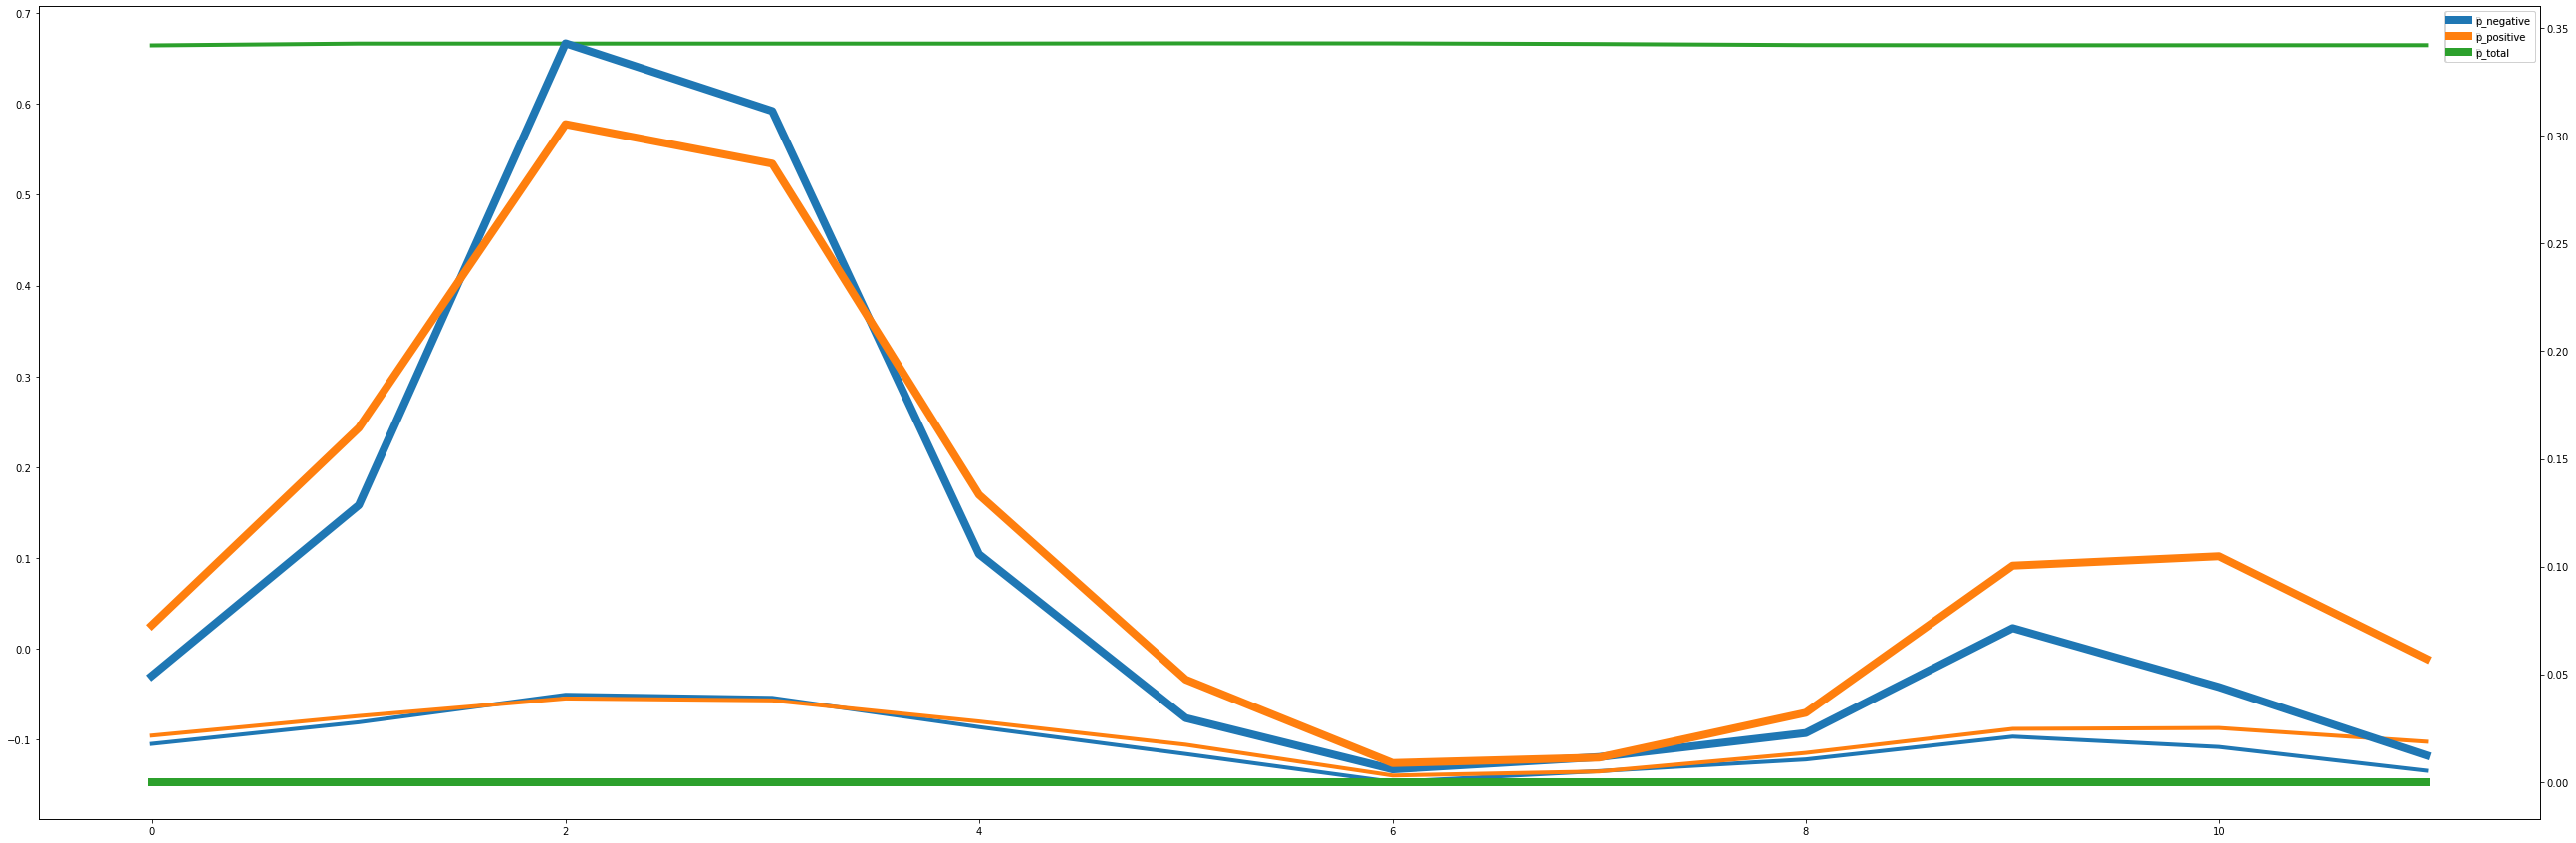

In [12]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
daily_total_R.plot(ax = ax1, linewidth = 4)
daily_total_p.plot(ax = ax2, linewidth = 8)

fig.set_figwidth(45)
fig.set_figheight(15)
plt.rc('font', size=20)

#p 값이 0일, 5~7일쯤 낮아지는 것을 확인할 수 있다.



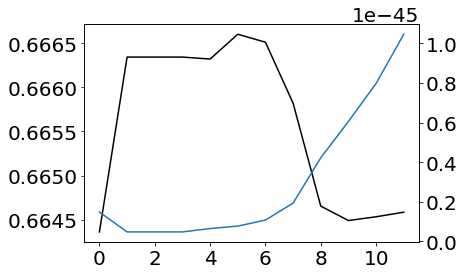

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
daily_total_R.R_total.plot(ax = ax1, color = 'black')
daily_total_p.p_total.plot(ax = ax2)
plt.rc('font', size = 4)



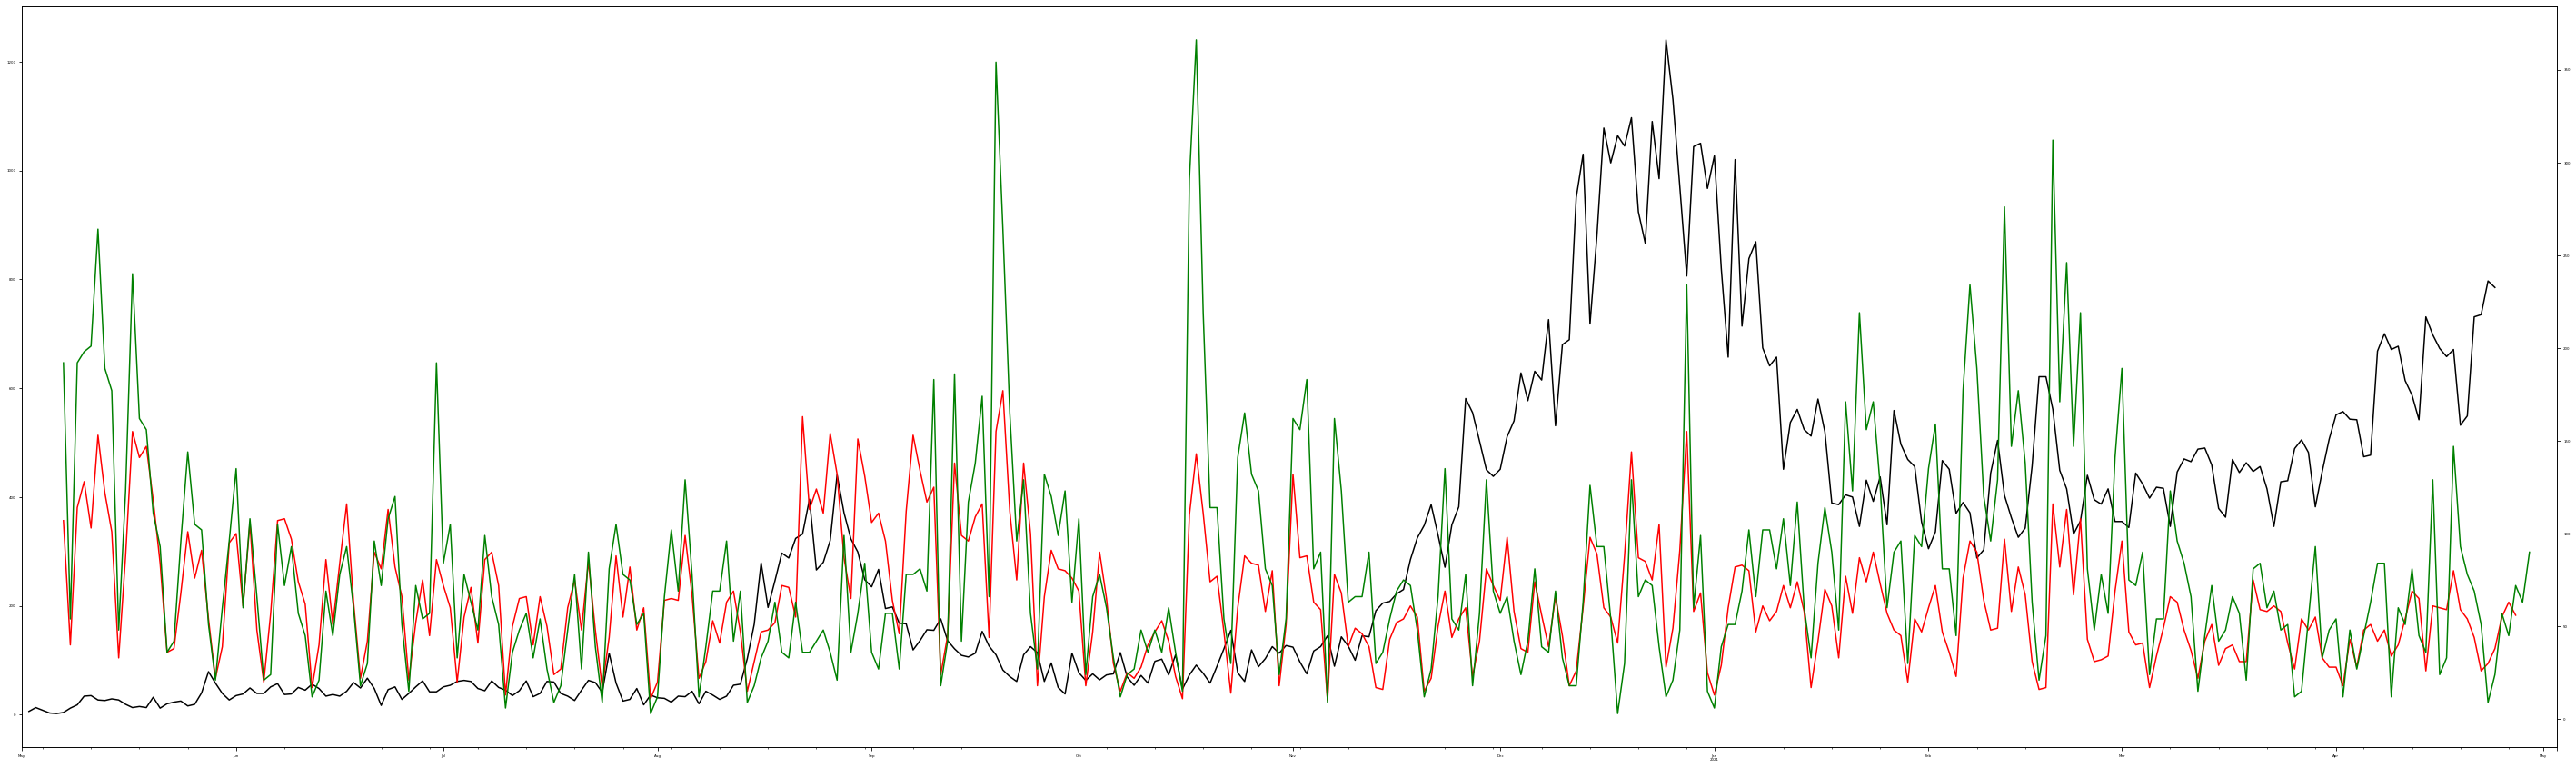

In [14]:
#확진자와 부정적,긍정적 키워드를 담은 뉴스 개수 그래프
#위의 결과를 고려해서 6일 차이를 주기로 하였다.
news_total.index = pd.date_range(start = '20200507', end = '20210429') 
news_p.index = pd.date_range(start = '20200507', end = '20210429') 
news_n.index = pd.date_range(start = '20200507', end = '20210429') 

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
Data_c1.Diff.plot(ax = ax1, color='black')
news_n.plot(ax = ax2, color = 'red')
news_p.plot(ax = ax2, color = 'green')
#news_total.plot(ax=ax2)

fig.set_figwidth(50)
fig.set_figheight(15)
plt.xlim([datetime(2020,5,1), datetime(2021,5,3)])
plt.rc('font', size=25)



In [15]:
Data_all = pd.concat([Data_c1.Diff, news_n, news_p, news_total], axis=1)
Data_all.dropna(inplace = True)
Data_all.corr()


,Diff,negative_news,positive_news,total_news
Diff,1.000000,-0.146367,-0.139261,-0.154170
negative_news,-0.146367,1.000000,0.666512,0.855237
positive_news,-0.139261,0.666512,1.000000,0.956368
total_news,-0.154170,0.855237,0.956368,1.000000


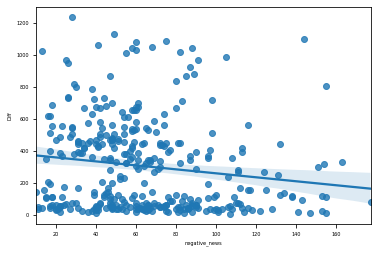

In [20]:
sns.regplot(data = Data_all, x = 'negative_news', y = 'Diff')
plt.rc('font', size=5)


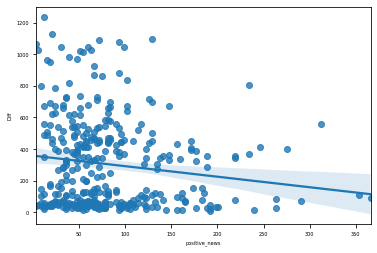

In [17]:
sns.regplot(data = Data_all, x = 'positive_news', y = 'Diff')
plt.rc('font', size=5)


In [27]:
[R2, p2] = stats.spearmanr(Data_all.Diff, Data_all.negative_news)
print('negative_news_spearman')
print([R2, p2])

[R2, p2] = stats.spearmanr(Data_all.Diff, Data_all.positive_news)
print('positive_news_spearman')
print([R2, p2])

[R2, p2] = stats.spearmanr(Data_all.Diff, Data_all.total_news)
print('total_news_spearman')
print([R2, p2])

[R2, p2] = stats.pearsonr(Data_all.Diff, Data_all.negative_news)
print('negative_news_pearson')
print([R2, p2])

[R2, p2] = stats.pearsonr(Data_all.Diff, Data_all.positive_news)
print('positive_news_pearson')
print([R2, p2])

[R2, p2] = stats.pearsonr(Data_all.Diff, Data_all.total_news)
print('total_news_pearson')
print([R2, p2])

[R2, p2] = stats.pearsonr(Data_all.negative_news, Data_all.positive_news)
print('negative_news_positive_news_pearson')
print([R2, p2])


#뉴스의 내용보다는 코로나 관련 뉴스 자체에 사람들이 많이 반응을 하는 것을 확인할 수 있다.
#코로나 뉴스 자체가 많이 나오는 날이 있음
#부정적인 키워드가 긍정적인 키워드보다는 상대적으로 영향을 많이 주는 것을 확인할 수 있다.
#6일뒤에 뉴스를 접한 효과가 나타남

negative_news_spearman
[-0.18121216162086917, 0.0006240136094131104]
positive_news_spearman
[-0.12286113334443886, 0.020948150203011343]
total_news_spearman
[-0.14824660918394306, 0.0052568419200759295]
negative_news_pearson
[-0.1463672874023511, 0.005867590970203547]
positive_news_pearson
[-0.1392607132308652, 0.008793769334106274]
total_news_pearson
[-0.15417044626621706, 0.0036877503575813717]
negative_news_positive_news_pearson
[0.6665120310763666, 1.07546644120681e-46]
